![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (150+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://www.jeroenbouma.com/fmp" target="_blank">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a **15% discount**. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use <a href="https://site.financialmodelingprep.com/contact" target="_blank">their contact form</a> or provide the data yourself. 

The current Notebook is revolved around the Toolkit class, a great starting point. If you are interested in the other modules, you can find the related Notebooks below. **Please view the documentation <a href="https://www.jeroenbouma.com/projects/financetoolkit/docs" target="_blank">here</a> to find all the available functionality.**

<style>
.button {
  color: #fff !important;
  background-color: #58abc4;
  display: inline-block;
  margin-bottom: 0.25em;
  padding: 0.5em 1em;
  font-family: -apple-system,BlinkMacSystemFont,"Roboto","Segoe UI","Helvetica Neue","Lucida Grande",Arial,sans-serif;
  font-size: .75em;
  font-weight: bold;
  text-align: center;
  text-decoration: none;
  border-width: 0;
  border-radius: 4px;
  cursor: pointer;
}

.button-current {
  background-color: #d67f05;
}

a:hover {
  color: #fff !important;
  font-weight: normal !important;
}
</style>

<div style="display: flex; justify-content: space-between;" class="show-on-desktop">
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//getting-started" target="_blank" class="button button-current" style="flex: 1;margin-right:5px"">Toolkit</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//discovery-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Discovery</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//ratios-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Ratios</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//models-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Models</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//options-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Options</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//technicals-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Technicals</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//risk-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Risk</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//performance-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Performance</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//economics-module"  target="_blank" class="button" style="flex: 1;margin-right:5px">Economics</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//fixed-income-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Fixed income</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//portfolio-module" target="_blank" class="button" style="flex: 1; ">Portfolio</a>
</div>

In [ ]:
from financetoolkit import Toolkit

API_KEY = "FINANCIAL_MODELING_PREP_API_KEY"

**Initializing only is required once.** This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum. Note that in this example annual data is used but by adding `quarterly=True` to the Toolkit initialization, quarterly data can also be collected. Note that this requires a Premium subscription from FMP.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(
    ["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY, start_date="2005-01-01"
)

Let's start off by collecting some historical data. Here, there are multiple periods that can be selected. This can be `daily`, `weekly`, `monthly`, `quarterly`, or `yearly`. The default is `daily`. If you provide an API key it will automatically collect data via FinancialModelingPrep, otherwise it defaults to Yahoo Finance. You can change this behaviour by changing the `historic_source` parameter in the toolkit initialization.

Obtaining historical data: 100%|██████████| 5/5 [00:00<00:00,  8.92it/s]


Open                                  High                       \
             AAPL   MSFT  GOOGL   AMZN Benchmark   AAPL   MSFT  GOOGL   AMZN   
date                                                                           
2005-01-03   1.16  26.82   4.94   2.25    121.56   1.16  26.95    5.1   2.27   
2005-01-04   1.14  26.87   5.04   2.13    120.46   1.17   27.1   5.08   2.16   
2005-01-05   1.15  26.85   4.84   2.08    118.74   1.17   27.1   4.93   2.14   
2005-01-06   1.16  26.87   4.89   2.09    118.44   1.16  27.06    4.9   2.11   
2005-01-07   1.16  26.82   4.77   2.07    118.97   1.24  26.89   4.86   2.13   
...           ...    ...    ...    ...       ...    ...    ...    ...    ...   
2025-04-21 193.27 362.82 148.88  169.6    521.16  193.8 364.48 148.95  169.6   
2025-04-22 196.12 363.38 148.89 169.85    520.14 201.59 367.77 152.19 176.78   
2025-04-23  206.0 376.06 155.61 183.45    540.43  208.0 380.39 157.53 187.38   
2025-04-24 204.89  375.7 156.15 180.92    536.72 208.83 388.45 159.59 186.74   
2025-04-25 206.37  387.0 165.07 187.62    546.65 209.75 392.16  166.1 189.94   

                      ... Excess Volatility                                 \
           Benchmark  ...              AAPL   MSFT  GOOGL   AMZN Benchmark   
date                  ...                                                    
2005-01-03    121.76  ...            0.0233 0.0207 0.0222 0.0266    0.0167   
2005-01-04    120.54  ...            0.0233 0.0207 0.0222 0.0266    0.0167   
2005-01-05    119.25  ...            0.0233 0.0207 0.0222 0.0266    0.0167   
2005-01-06    119.15  ...            0.0233 0.0207 0.0222 0.0266    0.0167   
2005-01-07    119.23  ...            0.0233 0.0207 0.0222 0.0266    0.0167   
...              ...  ...               ...    ...    ...    ...       ...   
2025-04-21     521.7  ...            0.0233 0.0207 0.0222 0.0266    0.0167   
2025-04-22     529.3  ...            0.0233 0.0207 0.0222 0.0266    0.0167   
2025-04-23    545.43  ...            0.0233 0.0207 0.0222 0.0266    0.0167   
2025-04-24    547.43  ...            0.0233 0.0207 0.0222 0.0266    0.0167   
2025-04-25    551.05  ...            0.0233 0.0207 0.0222 0.0266    0.0167   

           Cumulative Return                                    
                        AAPL    MSFT   GOOGL    AMZN Benchmark  
date                                                            
2005-01-03               1.0     1.0     1.0     1.0       1.0  
2005-01-04            1.0103  1.0038  0.9584  0.9462     0.987  
2005-01-05            1.0191  1.0016  0.9545  0.9372     0.981  
2005-01-06            1.0199  1.0005  0.9307  0.9193     0.986  
2005-01-07            1.0921  0.9973  0.9564  0.9507    0.9846  
...                      ...     ...     ...     ...       ...  
2025-04-21          202.8331 19.3909 29.2416 75.0314    6.2432  
2025-04-22          209.7426 19.8067 29.9941 77.6592    6.4057  
2025-04-23           214.846 20.2154 30.7624 80.9865    6.5049  
2025-04-24          218.8048 20.9125 31.5406 83.6502    6.6418  
2025-04-25          219.7604 21.1582 32.0713 84.7489    6.6898  

[5111 rows x 60 columns]

Open                                  High                       \
       AAPL   MSFT  GOOGL   AMZN Benchmark   AAPL   MSFT  GOOGL   AMZN   
Date                                                                     
2005   2.53  26.16  10.44   2.39     124.8   2.59  26.31  10.47   2.41   
2006    3.0  29.86  11.56    2.0     142.1   3.05  30.15  11.62   2.01   
2007   7.12   35.9  17.48   4.69     147.1   7.16  35.99  17.58   4.72   
2008   3.07  19.31   7.61   2.54     89.08   3.13  19.68   7.78   2.58   
2009   7.61  30.98  15.63   6.85    112.77   7.62  30.99  15.65   6.86   
2010  11.53   27.8  14.93    9.1    125.53  11.55  27.92  14.98   9.12   
2011  14.41   26.0  16.07   8.67    126.02  14.51  26.12  16.18   8.76   
2012  18.23  26.59  17.52  12.19    139.66  19.12  26.77  17.78  12.62   
2013  19.79   37.4  27.83  19.73    184.07  20.05  37.58  28.05  19.94   
2014  28.21  46.73  26.89  15.58    207.99  28.28  47.44  26.92  15.65   
2015  26.75  56.04  39.39   34.3    205.13  26.76  56.19  39.42  34.39   
2016  29.16  62.96  40.16  38.32    224.73   29.3  62.99  40.16  38.37   
2017  42.63  85.63  52.77  59.12    268.53  42.65  86.05   52.9   59.2   
2018  39.63 101.29  52.89  75.54    249.56  39.84  102.4  53.15  76.04   
2019  72.48 156.77  66.79   92.1    320.53  73.42 157.77  67.03  92.66   
2020 134.08  221.7  86.86 163.75    371.78 134.74  223.0  87.88 164.15   
2021 178.09 338.51 146.05 168.96    475.64 179.23 339.36  146.7 169.35   
2022 128.41 238.21  86.98  83.12    380.64 129.95 239.96   88.3  84.05   
2023  193.9  376.0 139.63  153.1    476.49  194.4 377.16 140.36 153.89   
2024 252.44  426.1 191.08 222.97    589.91 253.28 426.73 191.96 223.23   
2025 206.37  387.0 165.07 187.62    546.65 209.75 392.16  166.1 189.94   

                ... Excess Volatility                                 \
     Benchmark  ...              AAPL   MSFT  GOOGL   AMZN Benchmark   
Date            ...                                                    
2005    125.06  ...            0.3951 0.1445 0.3305 0.3556    0.1079   
2006    142.54  ...            0.3889 0.2126 0.3422 0.4046    0.1092   
2007    147.61  ...             0.378 0.2364 0.2481 0.5217    0.1648   
2008     90.97  ...            0.5846 0.4883 0.5565  0.665     0.419   
2009     112.8  ...            0.3447 0.3734 0.3083 0.5297    0.2684   
2010    125.87  ...            0.2758 0.2318 0.2939 0.3394    0.1939   
2011    126.33  ...            0.2786 0.2548  0.313 0.3887    0.2471   
2012    142.56  ...            0.2921  0.207  0.233 0.3177    0.1298   
2013    184.69  ...            0.2876 0.2616 0.2295  0.275    0.1295   
2014    208.19  ...            0.2196 0.1922 0.2136 0.3244     0.117   
2015    205.89  ...            0.2696  0.283 0.2882 0.3382    0.1559   
2016    224.83  ...              0.24 0.2341 0.2098 0.3062    0.1386   
2017    268.55  ...            0.1748 0.1485 0.1532  0.209    0.0686   
2018    250.19  ...            0.2899  0.285 0.2848 0.3641    0.1734   
2019    322.13  ...            0.2699 0.2047 0.2439 0.2327    0.1374   
2020    374.66  ...            0.4708  0.441 0.3875 0.3893    0.3392   
2021    476.86  ...            0.2514 0.2128 0.2468 0.2414    0.1321   
2022    382.58  ...            0.3773 0.3688 0.4048 0.5207    0.2659   
2023    477.03  ...             0.221 0.2628 0.3188 0.3421    0.1519   
2024    590.64  ...            0.2273 0.2054 0.2814 0.2841    0.1334   
2025    551.05  ...            0.4695 0.3272 0.3773 0.4195    0.2987   

     Cumulative Return                                    
                  AAPL    MSFT   GOOGL    AMZN Benchmark  
Date                                                      
2005               1.0     1.0     1.0     1.0       1.0  
2006            1.1806  1.1588  1.1104  0.8347    1.1585  
2007            2.7593  1.3999   1.667  1.9619     1.218  
2008            1.1898  0.7785  0.7415  1.0847    0.7699  
2009            2.9352  1.2493  1.4947  2.8517    0.9728  
2010            4.4954   1.16

<Axes: title={'center': 'Cumulative Returns of Apple, Microsoft, Google and Amazon'}, xlabel='Date', ylabel='Cumulative Return'>

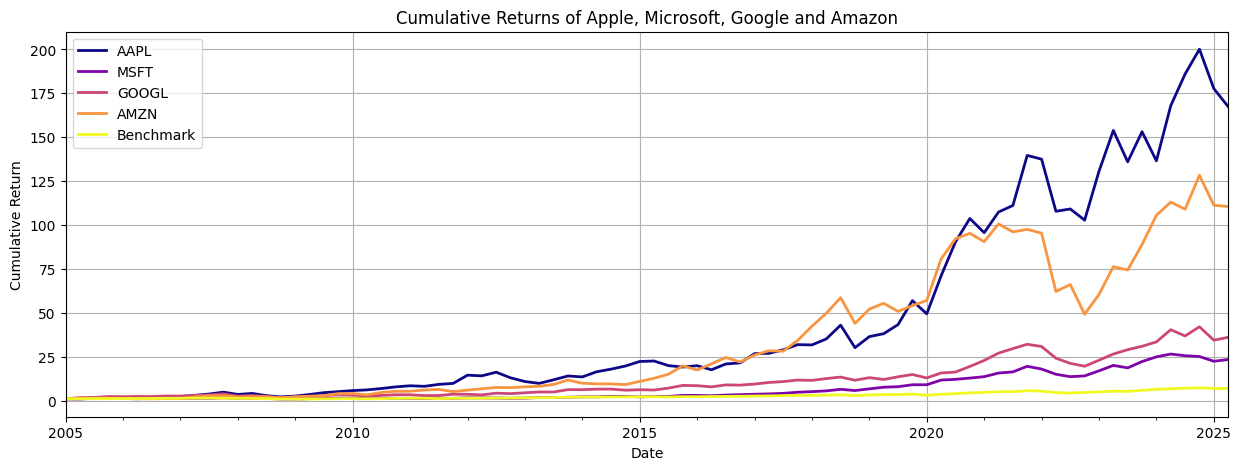

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data())

# Obtain yearly historical data from each company
display(companies.get_historical_data(period="yearly"))

# Plot the Cumulative Returns
companies.get_historical_data(period="quarterly")["Cumulative Return"].plot(
    figsize=(15, 5),
    title="Cumulative Returns of Apple, Microsoft, Google and Amazon",
    grid=True,
    linestyle="-",
    linewidth=2,
    colormap="plasma",
    xlabel="Date",
    ylabel="Cumulative Return",
)

It can be of help to understand some general statistics about this data as well, this can be done with `get_historical_statistics`. This is especially relevant when looking at products that are denoted in different currencies.

In [4]:
companies.get_historical_statistics()

Obtaining historical statistics: 100%|██████████| 4/4 [00:00<00:00,  9.47it/s]


,AAPL,MSFT,GOOGL,AMZN
Currency,USD,USD,USD,USD
Symbol,AAPL,MSFT,GOOGL,AMZN
Exchange Name,NMS,NMS,NMS,NMS
Instrument Type,EQUITY,EQUITY,EQUITY,EQUITY
First Trade Date,1980-12-12,1986-03-13,2004-08-19,1997-05-15
Regular Market Time,2025-04-25,2025-04-25,2025-04-25,2025-04-25
GMT Offset,-14400,-14400,-14400,-14400
Timezone,EDT,EDT,EDT,EDT
Exchange Timezone Name,America/New_York,America/New_York,America/New_York,America/New_York


Then on to the financial statements in which for any period, based on how this is defined in the Toolkit initialization, can be collected. This can also be quarterly financial statements if the `quarterly=True` parameter is added to the Toolkit initialization.

In [5]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

Obtaining balance data: 100%|██████████| 4/4 [00:00<00:00,  9.52it/s]


date                                                 2005          2006  \
AAPL Cash and Cash Equivalents               3491000000.0  6392000000.0   
     Short Term Investments                  4770000000.0  3718000000.0   
     Cash and Short Term Investments         8261000000.0 10110000000.0   
     Accounts Receivable                      895000000.0  1252000000.0   
      Other Receivables                       417000000.0  1593000000.0   
...                                                   ...           ...   
MSFT Accumulated Other Comprehensive Income  1426000000.0  1229000000.0   
     Total Shareholder Equity               48115000000.0 40104000000.0   
     Total Equity                           48115000000.0 40104000000.0   
     Minority Interest                                0.0           0.0   
     Total Liabilities and Equity           70815000000.0 69597000000.0   

date                                                 2007          2008  \
AAPL Cash and Cash Equivalents               9352000000.0 11875000000.0   
     Short Term Investments                  6034000000.0 10236000000.0   
     Cash and Short Term Investments        15386000000.0 22111000000.0   
     Accounts Receivable                     1637000000.0  2422000000.0   
      Other Receivables                      2392000000.0  2282000000.0   
...                                                   ...           ...   
MSFT Accumulated Other Comprehensive Income  1654000000.0  1140000000.0   
     Total Shareholder Equity               31097000000.0 36286000000.0   
     Total Equity                           31097000000.0 36286000000.0   
     Minority Interest                                0.0           0.0   
     Total Liabilities and Equity           63171000000.0 72793000000.0   

date                                                 2009          2010  \
AAPL Cash and Cash Equivalents               5263000000.0 11261000000.0   
     Short Term Investments                 18201000000.0 14359000000.0   
     Cash and Short Term Investments        23464000000.0 25620000000.0   
     Accounts Receivable                     3361000000.0  5510000000.0   
      Other Receivables                      1696000000.0  4414000000.0   
...                                                   ...           ...   
MSFT Accumulated Other Comprehensive Income   969000000.0 -8629000000.0   
     Total Shareholder Equity               39558000000.0 46175000000.0   
     Total Equity                           39558000000.0 46175000000.0   
     Minority Interest                                0.0           0.0   
     Total Liabilities and Equity           77888000000.0 86113000000.0   

date                                                  2011           2012  \
AAPL Cash and Cash Equivalents                9815000000.0  10746000000.0   
     Short Term Investments                  16137000000.0  18383000000.0   
     Cash and Short Term Investments         25952000000.0  29129000000.0   
     Accounts Receivable                      5369000000.0  10930000000.0   
      Other Receivables                       6348000000.0   7762000000.0   
...                                                    ...            ...   
MSFT Accumulated Other Comprehensive Income   1863000000.0   1422000000.0   
     Total Shareholder Equity                57083000000.0  66363000000.0   
     Total Equity                            57083000000.0  66363000000.0   
     Minority Interest                                 0.0            0.0   
     Total Liabilities and Equity           108704000000.0 121271000000.0   

date                                                  2013           2014  \
AAPL Cash and Cash Equivalents               14259000000.0  13844000000.0   
     Short Term Investments                  26287000000.0  11233000000.0   
     Cash and Short Term Investments         40546000000.0  25077000000.0   
     Accounts Receivable                     13102000000.0  1746

In [6]:
# Obtain the income statements from each company
companies.get_income_statement()

Obtaining income data: 100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


date                                              2005          2006  \
AAPL Revenue                             13931000000.0 19315000000.0   
     Cost of Goods Sold                   9888000000.0 13717000000.0   
     Gross Profit                         4043000000.0  5598000000.0   
     Research and Development Expenses     534000000.0   712000000.0   
     General and Administrative Expenses           0.0           0.0   
...                                                ...           ...   
MSFT Net Income Deductions                         0.0           0.0   
     Net Income                          12254000000.0 12599000000.0   
     EPS                                          1.13          1.21   
     Weighted Average Shares             10839000000.0 10438000000.0   
     Weighted Average Shares Diluted     10906000000.0 10531000000.0   

date                                              2007          2008  \
AAPL Revenue                             24006000000.0 32479000000.0   
     Cost of Goods Sold                  15852000000.0 21334000000.0   
     Gross Profit                         8154000000.0 11145000000.0   
     Research and Development Expenses     782000000.0  1109000000.0   
     General and Administrative Expenses           0.0           0.0   
...                                                ...           ...   
MSFT Net Income Deductions                         0.0           0.0   
     Net Income                          14065000000.0 17681000000.0   
     EPS                                          1.44           1.9   
     Weighted Average Shares              9742000000.0  9328000000.0   
     Weighted Average Shares Diluted      9886000000.0  9470000000.0   

date                                              2009          2010  \
AAPL Revenue                             36537000000.0 65225000000.0   
     Cost of Goods Sold                  23397000000.0 39541000000.0   
     Gross Profit                        13140000000.0 25684000000.0   
     Research and Development Expenses    1333000000.0  1782000000.0   
     General and Administrative Expenses           0.0           0.0   
...                                                ...           ...   
MSFT Net Income Deductions                         0.0           0.0   
     Net Income                          14569000000.0 18760000000.0   
     EPS                                          1.63          2.13   
     Weighted Average Shares              8945000000.0  8813000000.0   
     Weighted Average Shares Diluted      8996000000.0  8927000000.0   

date                                               2011           2012  \
AAPL Revenue                             108249000000.0 156508000000.0   
     Cost of Goods Sold                   64431000000.0  87846000000.0   
     Gross Profit                         43818000000.0  68662000000.0   
     Research and Development Expenses     2429000000.0   3381000000.0   
     General and Administrative Expenses            0.0   9040000000.0   
...                                                 ...            ...   
MSFT Net Income Deductions                          0.0            0.0   
     Net Income                           23150000000.0  16978000000.0   
     EPS                                           2.73           2.02   
     Weighted Average Shares               8490000000.0   8396000000.0   
     Weighted Average Shares Diluted       8593000000.0   8506000000.0   

date                                               2013           2014  \
AAPL Revenue                             170910000000.0 182795000000.0   
     Cost of Goods Sold                  106606000000.0 112258000000.0   
     Gross Profit                         64304000000.0  70537000000.0   
     Research and Development Expenses     4475000000.0   6041000000.0   
     General and Administrative Expenses   9730000000.0            0.0   
...                                                 ...            ...  

In [7]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

Obtaining cashflow data: 100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


date                                        2005          2006          2007  \
AAPL Net Income                     1328000000.0  1989000000.0  3496000000.0   
     Depreciation and Amortization   179000000.0   225000000.0   317000000.0   
     Deferred Income Tax              50000000.0    53000000.0    78000000.0   
     Stock Based Compensation         49000000.0   163000000.0   242000000.0   
     Change in Working Capital       492000000.0  -225000000.0  1325000000.0   
...                                          ...           ...           ...   
MSFT Operating Cash Flow           16605000000.0 14404000000.0 17796000000.0   
     Capital Expenditure            -812000000.0 -1578000000.0 -2264000000.0   
     Free Cash Flow                15793000000.0 12826000000.0 15532000000.0   
     Income Taxes Paid                       0.0           0.0           0.0   
     Interest Paid                           0.0           0.0           0.0   

date                                        2008          2009          2010  \
AAPL Net Income                     6119000000.0  8235000000.0 14013000000.0   
     Depreciation and Amortization   496000000.0   734000000.0  1027000000.0   
     Deferred Income Tax             398000000.0  1040000000.0  1440000000.0   
     Stock Based Compensation        516000000.0   710000000.0   879000000.0   
     Change in Working Capital      2045000000.0  -586000000.0  1236000000.0   
...                                          ...           ...           ...   
MSFT Operating Cash Flow           21612000000.0 19037000000.0 24073000000.0   
     Capital Expenditure           -3182000000.0 -3119000000.0 -1977000000.0   
     Free Cash Flow                18430000000.0 15918000000.0 22096000000.0   
     Income Taxes Paid                       0.0           0.0           0.0   
     Interest Paid                           0.0           0.0           0.0   

date                                        2011          2012          2013  \
AAPL Net Income                    25922000000.0 41733000000.0 37037000000.0   
     Depreciation and Amortization  1814000000.0  3277000000.0  6757000000.0   
     Deferred Income Tax            2868000000.0  4405000000.0  1141000000.0   
     Stock Based Compensation       1168000000.0  1740000000.0  2253000000.0   
     Change in Working Capital      5757000000.0  -299000000.0  6478000000.0   
...                                          ...           ...           ...   
MSFT Operating Cash Flow           26994000000.0 31626000000.0 28833000000.0   
     Capital Expenditure           -2355000000.0 -2305000000.0 -4257000000.0   
     Free Cash Flow                24639000000.0 29321000000.0 24576000000.0   
     Income Taxes Paid                       0.0           0.0           0.0   
     Interest Paid                           0.0           0.0           0.0   

date                                        2014          2015          2016  \
AAPL Net Income                    39510000000.0 53394000000.0 45687000000.0   
     Depreciation and Amortization  7946000000.0 11257000000.0 10505000000.0   
     Deferred Income Tax            2347000000.0  1382000000.0  4938000000.0   
     Stock Based Compensation       2863000000.0  3586000000.0  4210000000.0   
     Change in Working Capital      7047000000.0 11262000000.0   405000000.0   
...                                          ...           ...           ...   
MSFT Operating Cash Flow           32231000000.0 29080000000.0 33325000000.0   
     Capital Expenditure           -5485000000.0 -5944000000.0 -8343000000.0   
     Free Cash Flow                26746000000.0 23136000000.0 24982000000.0   
     Income Taxes Paid                       0.0           0.0           0.0   
     Interest Paid                           0.0           0.0           0.0   

date                                        2017           2018  \
AAPL Net Income                    48351000000.0  59531000000.0   
     Depreciation and 

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Cash and Cash Equivalents,1013000000.0,1022000000.0,2539000000.0,2769000000.0,3444000000.0,3777000000.0,5269000000.0,8084000000.0,8658000000.0,14557000000.0,15890000000.0,19334000000.0,20522000000.0,31750000000.0,36092000000.0,42122000000.0,36220000000.0,53888000000.0,73387000000.0,78779000000.0
Short Term Investments,987000000.0,997000000.0,573000000.0,958000000.0,2922000000.0,4985000000.0,4307000000.0,3364000000.0,3789000000.0,2859000000.0,3918000000.0,6647000000.0,10464000000.0,9500000000.0,18929000000.0,42274000000.0,59829000000.0,16138000000.0,13393000000.0,22423000000.0
Cash and Short Term Investments,2000000000.0,2019000000.0,3112000000.0,3727000000.0,6366000000.0,8762000000.0,9576000000.0,11448000000.0,12447000000.0,17416000000.0,19808000000.0,25981000000.0,30986000000.0,41250000000.0,55021000000.0,84396000000.0,96049000000.0,70026000000.0,86780000000.0,101202000000.0
Accounts Receivable,274000000.0,399000000.0,1410000000.0,1654000000.0,988000000.0,1587000000.0,2571000000.0,3817000000.0,4767000000.0,5612000000.0,5654000000.0,8339000000.0,13164000000.0,16677000000.0,20816000000.0,24542000000.0,32891000000.0,42360000000.0,52253000000.0,55451000000.0
Other Receivables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
AAPL,NaN,0.3865,0.2429,0.353,0.1249,0.7852,0.6596,0.4458,0.092,0.0695,0.2786,-0.0773,0.063,0.1586,-0.0204,0.0551,0.3326,0.0779,-0.028,0.0202
AMZN,NaN,0.2616,0.385,0.2919,0.2788,0.3956,0.4056,0.2707,0.2187,0.1952,0.2025,0.2708,0.308,0.3093,0.2045,0.3762,0.217,0.094,0.1183,0.1099
GOOGL,NaN,0.7276,0.5647,0.3135,0.0851,0.2397,0.2928,0.2146,0.2059,0.1888,0.1362,0.2038,0.228,0.2342,0.183,0.1277,0.4115,0.0978,0.0868,0.1387
MSFT,NaN,0.1129,0.1545,0.1819,-0.0328,0.0693,0.1194,0.054,0.056,0.1154,0.0777,-0.0259,0.0594,0.1428,0.1403,0.1365,0.1753,0.1796,0.0688,0.1567


<Axes: title={'center': 'Total Shareholder Equity over the Years'}, xlabel='Date', ylabel='Total Shareholder Equity'>

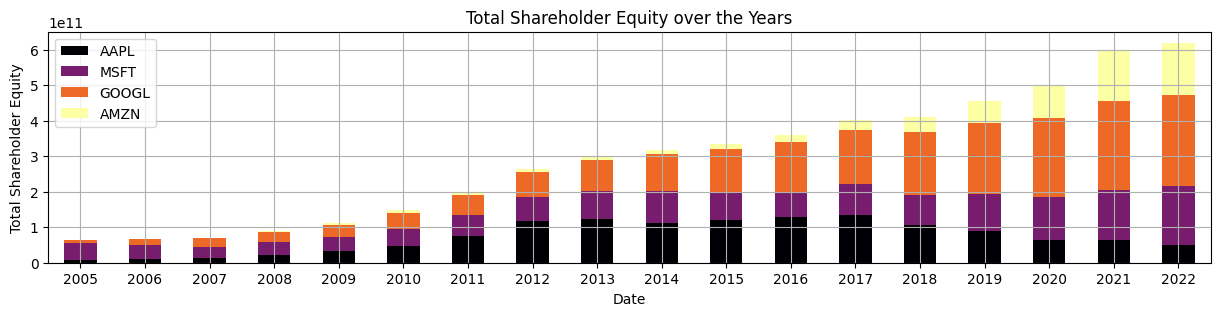

In [8]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()
income_statement_growth = companies.get_income_statement(growth=True)

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Revenues for each company
display(income_statement_growth.loc[:, "Revenue", :])

# Plot the value of Total Shareholder Equity for each company in 2022
shareholder_value = balance_sheet.loc[
    (companies._tickers, "Total Shareholder Equity"), :"2022"
].T
shareholder_value.columns = companies._tickers
shareholder_value.plot.bar(
    figsize=(15, 3),
    title="Total Shareholder Equity over the Years",
    grid=True,
    colormap="inferno",
    rot=0,
    xlabel="Date",
    ylabel="Total Shareholder Equity",
    stacked=True,
)

As shown above, it is possible to show the growth rates for all of the financial statements which can be done by setting `growth=True` in the function. This can also be done within many of the other modules.

In [9]:
companies.get_income_statement(growth=True)

date                                      2005    2006    2007    2008  \
AAPL Revenue                               NaN  0.3865  0.2429   0.353   
     Cost of Goods Sold                    NaN  0.3872  0.1556  0.3458   
     Gross Profit                          NaN  0.3846  0.4566  0.3668   
     Research and Development Expenses     NaN  0.3333  0.0983  0.4182   
     General and Administrative Expenses   NaN     NaN     NaN     NaN   
...                                        ...     ...     ...     ...   
MSFT Net Income Deductions                 NaN     NaN     NaN     NaN   
     Net Income                            NaN  0.0282  0.1164  0.2571   
     EPS                                   NaN  0.0708  0.1901  0.3194   
     Weighted Average Shares               NaN  -0.037 -0.0667 -0.0425   
     Weighted Average Shares Diluted       NaN -0.0344 -0.0612 -0.0421   

date                                        2009    2010    2011    2012  \
AAPL Revenue                              0.1249  0.7852  0.6596  0.4458   
     Cost of Goods Sold                   0.0967    0.69  0.6295  0.3634   
     Gross Profit                          0.179  0.9546   0.706   0.567   
     Research and Development Expenses     0.202  0.3368  0.3631  0.3919   
     General and Administrative Expenses     NaN     NaN     NaN     inf   
...                                          ...     ...     ...     ...   
MSFT Net Income Deductions                   NaN     NaN     NaN     NaN   
     Net Income                           -0.176  0.2877   0.234 -0.2666   
     EPS                                 -0.1421  0.3067  0.2817 -0.2601   
     Weighted Average Shares             -0.0411 -0.0148 -0.0367 -0.0111   
     Weighted Average Shares Diluted     -0.0501 -0.0077 -0.0374 -0.0101   

date                                        2013    2014    2015    2016  \
AAPL Revenue                               0.092  0.0695  0.2786 -0.0773   
     Cost of Goods Sold                   0.2136   0.053  0.2479 -0.0622   
     Gross Profit                        -0.0635  0.0969  0.3273    -0.1   
     Research and Development Expenses    0.3236  0.3499  0.3354  0.2452   
     General and Administrative Expenses  0.0763    -1.0     NaN     NaN   
...                                          ...     ...     ...     ...   
MSFT Net Income Deductions                   NaN     NaN     NaN     NaN   
     Net Income                           0.2877  0.0097 -0.4476  0.6845   
     EPS                                  0.2921  0.0192 -0.4398  0.4228   
     Weighted Average Shares             -0.0025 -0.0091 -0.0147 -0.0308   
     Weighted Average Shares Diluted     -0.0042 -0.0084 -0.0173 -0.0292   

date                                        2017    2018    2019    2020  \
AAPL Revenue                               0.063  0.1586 -0.0204  0.0551   
     Cost of Goods Sold                   0.0736   0.161 -0.0121  0.0481   
     Gross Profit                         0.0466  0.1548 -0.0338  0.0667   
     Research and Development Expenses    0.1529  0.2293  0.1392  0.1563   
     General and Administrative Expenses     NaN     NaN     NaN     NaN   
...                                          ...     ...     ...     ...   
MSFT Net Income Deductions                   NaN     NaN     NaN     NaN   
     Net Income                            0.241 -0.3499   1.368  0.1285   
     EPS                                  0.2925 -0.2153  1.3767  0.1389   
     Weighted Average Shares             -0.0226 -0.0059 -0.0035 -0.0082   
     Weighted Average Shares Diluted     -0.0226 -0.0049 -0.0053  -0.009   

date                                        2021    2022    2023    2024  
AAPL Revenue                              0.3326  0.0779  -0.028  0.0202  
     Cost of Goods Sold                   0.2561  0.0496 -0.0421 -0.0177  
     Gross Profit                         0.4562  0.1174 -0.0096  0.0682  
     Research and Development Expenses    0.1686  0.1979  0.1396  0.0486

By default, the lag is set to 1 (one period) but it is possible to change this and add multiple lags as well. This allows you to obtain lagged growth.

In [10]:
companies.get_income_statement(growth=True, lag=[1, 2, 3])

date                                        2005    2006    2007    2008  \
AAPL Revenue                         Lag 1   NaN  0.3865  0.2429   0.353   
                                     Lag 2   NaN     NaN  0.7232  0.6815   
                                     Lag 3   NaN     NaN     NaN  1.3314   
     Cost of Goods Sold              Lag 1   NaN  0.3872  0.1556  0.3458   
                                     Lag 2   NaN     NaN  0.6032  0.5553   
...                                          ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2   NaN     NaN -0.1012 -0.1063   
                                     Lag 3   NaN     NaN     NaN -0.1394   
     Weighted Average Shares Diluted Lag 1   NaN -0.0344 -0.0612 -0.0421   
                                     Lag 2   NaN     NaN -0.0935 -0.1008   
                                     Lag 3   NaN     NaN     NaN -0.1317   

date                                          2009    2010    2011    2012  \
AAPL Revenue                         Lag 1  0.1249  0.7852  0.6596  0.4458   
                                     Lag 2   0.522  1.0082  1.9627  1.3995   
                                     Lag 3  0.8916   1.717  2.3329  3.2835   
     Cost of Goods Sold              Lag 1  0.0967    0.69  0.6295  0.3634   
                                     Lag 2   0.476  0.8534  1.7538  1.2216   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0818 -0.0552 -0.0509 -0.0473   
                                     Lag 3  -0.143 -0.0954 -0.0898 -0.0614   
     Weighted Average Shares Diluted Lag 1 -0.0501 -0.0077 -0.0374 -0.0101   
                                     Lag 2   -0.09 -0.0573 -0.0448 -0.0472   
                                     Lag 3 -0.1458  -0.097 -0.0926 -0.0545   

date                                          2013    2014    2015    2016  \
AAPL Revenue                         Lag 1   0.092  0.0695  0.2786 -0.0773   
                                     Lag 2  0.5789   0.168  0.3675  0.1797   
                                     Lag 3  1.6203  0.6887  0.4933  0.2617   
     Cost of Goods Sold              Lag 1  0.2136   0.053  0.2479 -0.0622   
                                     Lag 2  0.6546  0.2779  0.3141  0.1703   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0135 -0.0116 -0.0236 -0.0451   
                                     Lag 3 -0.0497 -0.0225 -0.0261 -0.0537   
     Weighted Average Shares Diluted Lag 1 -0.0042 -0.0084 -0.0173 -0.0292   
                                     Lag 2 -0.0143 -0.0126 -0.0255  -0.046   
                                     Lag 3 -0.0512 -0.0226 -0.0296  -0.054   

date                                          2017    2018    2019    2020  \
AAPL Revenue                         Lag 1   0.063  0.1586 -0.0204  0.0551   
                                     Lag 2 -0.0192  0.2317   0.135  0.0336   
                                     Lag 3   0.254  0.1364  0.2065  0.1975   
     Cost of Goods Sold              Lag 1  0.0736   0.161 -0.0121  0.0481   
                                     Lag 2  0.0068  0.2465   0.147  0.0354   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0527 -0.0284 -0.0094 -0.0117   
                                     Lag 3 -0.0666 -0.0583 -0.0318 -0.0176   
     Weighted Average Shares Diluted Lag 1 -0.0226 -0.0049 -0.0053  -0.009   
                                     Lag 2 -0.0511 -0.0273 -0.0101 -0.0142   
                                     Lag 3 -0.0675 -0.0557 -0.0324  -0.019   

date                                          2021    2022    2023    2024  
AAPL Revenue                         Lag 1  0.3326  0.0779  -0.028  0.0202  
                                     Lag 2   0.406  0.4365  0.0478 -0.0084  
                                     Lag 3  0

It is also possible to get trailing results. E.g. the TTM Revenues can be acquired by setting trailing to 4 (quarters). Note that this specific metric requires th `quarterly=True` in the Toolkit initalization. Here, you can also combine this with the `growth=True` parameter to get trailing revenue growth.

<Axes: title={'center': '4 Year Trailing Revenue Growth for Apple, Microsoft, Google and Amazon'}, xlabel='Date', ylabel='Revenue'>

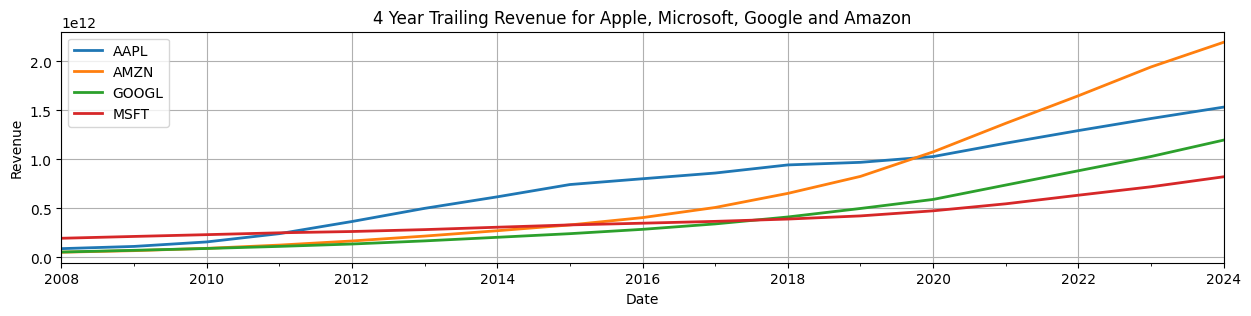

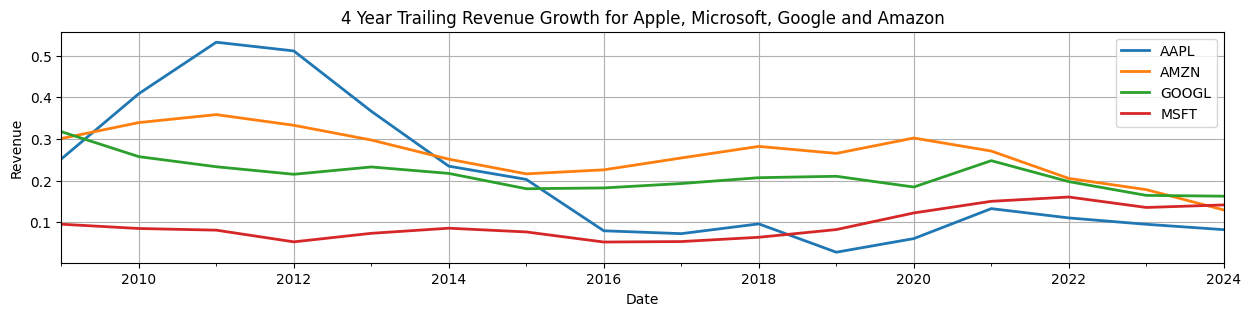

In [11]:
companies.get_income_statement(trailing=4).loc[:, "Revenue", :].T.dropna().plot(
    figsize=(15, 3),
    title="4 Year Trailing Revenue for Apple, Microsoft, Google and Amazon",
    grid=True,
    linestyle="-",
    linewidth=2,
    xlabel="Date",
    ylabel="Revenue",
)

companies.get_income_statement(trailing=4, growth=True).loc[
    :, "Revenue", :
].T.dropna().plot(
    figsize=(15, 3),
    title="4 Year Trailing Revenue Growth for Apple, Microsoft, Google and Amazon",
    grid=True,
    linestyle="-",
    linewidth=2,
    xlabel="Date",
    ylabel="Revenue",
)

It is possible to delve deeper with `get_revenue_product_segmentation` and `get_revenue_geographic_segmentation`. Do note that this is a Professional/Enterprise feature. As an example, this is how this would look for Apple. Note that the Product and Geographic Names can change over time.

In [12]:
display(
    companies.get_revenue_product_segmentation().loc[
        "AAPL", ["Ipad", "Iphone", "Mac"], :
    ]
)

display(companies.get_revenue_geographic_segmentation().loc["AAPL"])

Obtaining product segmentation data: 100%|██████████| 4/4 [00:00<00:00,  9.49it/s]


2010  2011          2012          2013           2014  \
AAPL Ipad     0.0   0.0           0.0 31980000000.0  30283000000.0   
     Iphone   0.0   0.0           0.0 91279000000.0 101991000000.0   
     Mac      0.0   0.0 23221000000.0 21483000000.0  24079000000.0   

                      2015           2016           2017           2018  \
AAPL Ipad    23227000000.0  20628000000.0  19222000000.0  18805000000.0   
     Iphone 155041000000.0 136700000000.0 141319000000.0 166699000000.0   
     Mac     25471000000.0  22831000000.0  25850000000.0  25484000000.0   

                      2019           2020           2021           2022  \
AAPL Ipad    21280000000.0  23724000000.0  31862000000.0  29292000000.0   
     Iphone 142381000000.0 137781000000.0 191973000000.0 205489000000.0   
     Mac     25740000000.0  28622000000.0  35190000000.0  40177000000.0   

                      2023           2024  
AAPL Ipad    28300000000.0  26694000000.0  
     Iphone 200583000000.0 201183000000.0  
     Mac     29357000000.0  29984000000.0

Obtaining geographic segmentation data: 100%|██████████| 4/4 [00:00<00:00,  9.54it/s]


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Americas,24498000000.0,38315000000.0,57512000000.0,62739000000.0,65232000000.0,93864000000.0,86613000000.0,96600000000.0,112093000000.0,0.0,124556000000.0,153306000000.0,169658000000.0,162560000000.0,167045000000.0
Asia Pacific,8256000000.0,22592000000.0,33274000000.0,11181000000.0,0.0,0.0,0.0,0.0,0.0,0.0,19593000000.0,26356000000.0,29375000000.0,29615000000.0,30658000000.0
China,0.0,0.0,0.0,25417000000.0,29846000000.0,58715000000.0,48492000000.0,44764000000.0,51942000000.0,43678000000.0,40308000000.0,68366000000.0,74200000000.0,72559000000.0,66952000000.0
Europe,18692000000.0,27778000000.0,36323000000.0,37883000000.0,40929000000.0,50337000000.0,49952000000.0,54938000000.0,62420000000.0,0.0,68640000000.0,89307000000.0,95118000000.0,94294000000.0,101328000000.0
Japan,3981000000.0,5437000000.0,10571000000.0,13462000000.0,14982000000.0,15706000000.0,16928000000.0,17733000000.0,21733000000.0,0.0,21418000000.0,28482000000.0,25977000000.0,24257000000.0,25052000000.0
Other Countries,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114230000000.0,0.0,0.0,0.0,0.0,0.0
United States,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102266000000.0,0.0,0.0,0.0,0.0,0.0


Not only past observations are observable, with `get_analyst_estimates` you can also get the analyst estimates for the future and see the earnings calendar with `get_earnings_calendar`

In [13]:
companies.get_analyst_estimates()

Obtaining analyst estimates: 100%|██████████| 4/4 [00:00<00:00,  9.44it/s]


date                                        2005         2006          2007  \
AAPL Estimated Revenue Low         13626659998.0          NaN 18693939340.0   
     Estimated Revenue High        20439989997.0          NaN 28040909010.0   
     Estimated Revenue Average     17033324998.0          NaN 23367424175.0   
     Estimated EBITDA Low           1741024242.0          NaN  4015137390.0   
     Estimated EBITDA High          2611536363.0          NaN  6022706085.0   
...                                          ...          ...           ...   
AMZN Estimated SGA Expense Average  1089289766.0 1323300865.0  1770191918.0   
     Estimated EPS Average                  0.04        0.015         0.055   
     Estimated EPS High                     0.05         0.02          0.06   
     Estimated EPS Low                      0.03         0.01          0.05   
     Number of Analysts                     19.0         19.0          12.0   

date                                        2008          2009          2010  \
AAPL Estimated Revenue Low         26765317646.0 33020178101.0 51133805598.0   
     Estimated Revenue High        40147976469.0 49530267154.0 76700708397.0   
     Estimated Revenue Average     33456647058.0 41275222628.0 63917256998.0   
     Estimated EBITDA Low           4898933332.0  7880186154.0 14640464486.0   
     Estimated EBITDA High          7348399998.0 11820279232.0 21960696730.0   
...                                          ...           ...           ...   
AMZN Estimated SGA Expense Average  1886118461.0  2329935197.0  4695092398.0   
     Estimated EPS Average                  0.05         0.065         0.125   
     Estimated EPS High                     0.06          0.08          0.15   
     Estimated EPS Low                      0.04          0.05           0.1   
     Number of Analysts                     12.0           7.0           9.0   

date                                         2011           2012  \
AAPL Estimated Revenue Low          84668972076.0 128156865993.0   
     Estimated Revenue High        127003458115.0 192235298991.0   
     Estimated Revenue Average     105836215096.0 160196082492.0   
     Estimated EBITDA Low           27829630700.0  48165863290.0   
     Estimated EBITDA High          41744446050.0  72248794936.0   
...                                           ...            ...   
AMZN Estimated SGA Expense Average   7088709968.0  13180000000.0   
     Estimated EPS Average                   0.08           0.03   
     Estimated EPS High                       0.1           0.04   
     Estimated EPS Low                       0.06           0.02   
     Number of Analysts                      14.0           17.0   

date                                         2013           2014  ...  \
AAPL Estimated Revenue Low         136071463842.0 142688813098.0  ...   
     Estimated Revenue High        204107195765.0 214033219648.0  ...   
     Estimated Revenue Average     170089329804.0 178361016373.0  ...   
     Estimated EBITDA Low           45114743880.0  48311071150.0  ...   
     Estimated EBITDA High          67672115819.0  72466606725.0  ...   
...                                           ...            ...  ...   
AMZN Estimated SGA Expense Average   5638539460.0   4310017547.0  ...   
     Estimated EPS Average                   0.04         -0.015  ...   
     Estimated EPS High                      0.06        -0.0146  ...   
     Estimated EPS Low                       0.02        -0.0153  ...   
     Number of Analysts                      19.0           18.0  ...   

date                                         2020           2021  \
AAPL Estimated Revenue Low         261234191846.0 350235969955.0   
     Estimated Revenue High        284448050223.0 381358726696.0   
     Estimated Revenue Average     273305434710.0 366419852406.0   
     Estimated EBITDA Low           58883296895.0  85099128888.0   
     Estimated EBITDA High          88324945342.0 127648

Both the Earnings and Dividend Calendars are available.

In [14]:
display(companies.get_earnings_calendar())

display(companies.get_dividend_calendar())

Obtaining earnings calendars: 100%|██████████| 4/4 [00:00<00:00,  9.31it/s]


EPS  Estimated EPS        Revenue  Estimated Revenue  \
     date                                                                 
AAPL 2005-01-12 0.0126         0.0087   3490000000.0       2879249998.0   
     2005-04-13 0.0121         0.0087   3243000000.0       2675474997.0   
     2005-07-13 0.0132         0.0112   3520000000.0       2816000000.0   
     2005-10-11 0.0177         0.0173   3678000000.0       5792850000.0   
     2006-01-18   0.02         0.0187   5749000000.0       5749000000.0   
...                ...            ...            ...                ...   
AMZN 2024-02-01    1.0            0.8 169961000000.0     166172000000.0   
     2024-04-30   0.98           0.83 143313000000.0     142654161020.0   
     2024-08-01   1.26           1.03 147977000000.0     148665347243.0   
     2024-10-31   1.43           1.14 158877000000.0     157275157418.0   
     2025-02-06   1.86           1.49 187792000000.0     187337375136.0   

                Fiscal Date Ending Time  
     date                                
AAPL 2005-01-12         2004-12-25  amc  
     2005-04-13         2005-03-26  amc  
     2005-07-13         2005-06-25  amc  
     2005-10-11         2005-09-24  amc  
     2006-01-18         2005-12-31  amc  
...                            ...  ...  
AMZN 2024-02-01         2023-12-31  amc  
     2024-04-30         2024-03-31  amc  
     2024-08-01         2024-06-30  amc  
     2024-10-31         2024-09-30  amc  
     2025-02-06         2024-12-31  amc  

[325 rows x 6 columns]

Obtaining dividend calendars: 100%|██████████| 4/4 [00:00<00:00,  9.45it/s]


Adj Dividend  Dividend Record Date Payment Date  \
      date                                                          
AAPL  2012-08-09        0.0946      2.65  2012-08-13   2012-08-16   
      2012-11-07        0.0946      2.65  2012-11-12   2012-11-15   
      2013-02-07        0.0946      2.65  2013-02-11   2013-02-14   
      2013-05-09        0.1089      3.05  2013-05-13   2013-05-16   
      2013-08-08        0.1089      3.05  2013-08-12   2013-08-15   
...                        ...       ...         ...          ...   
MSFT  2025-02-20          0.83      0.83  2025-02-20   2025-03-13   
GOOGL 2024-06-10           0.2       0.2  2024-06-10   2024-06-17   
      2024-09-09           0.2       0.2  2024-09-09   2024-09-16   
      2024-12-09           0.2       0.2  2024-12-09   2024-12-16   
      2025-03-10           0.2       0.2  2025-03-10   2025-03-17   

                 Declaration Date  
      date                         
AAPL  2012-08-09       2012-07-24  
      2012-11-07       2012-10-25  
      2013-02-07       2013-01-24  
      2013-05-09       2013-04-23  
      2013-08-08       2013-07-24  
...                           ...  
MSFT  2025-02-20       2024-12-03  
GOOGL 2024-06-10       2024-04-25  
      2024-09-09       2024-07-17  
      2024-12-09       2024-10-28  
      2025-03-10       2025-02-04  

[136 rows x 5 columns]

It is also possible to look into Environmental, Social and Governance (ESG) data through `get_esg_scores`

In [15]:
companies.get_esg_scores()

Obtaining ESG scores: 100%|██████████| 4/4 [00:00<00:00,  9.44it/s]


Environmental Score                   Social Score                    \
                    AAPL  MSFT GOOGL  AMZN         AAPL  MSFT GOOGL  AMZN   
date                                                                        
2005               67.69 74.03   NaN 52.95         46.7 61.05   NaN 57.24   
2006               67.88   NaN   NaN 52.78        46.73   NaN   NaN 57.86   
2007               65.66   NaN   NaN 52.06        46.24   NaN   NaN  56.6   
2008               65.36   NaN   NaN 52.39        47.53   NaN   NaN 56.08   
2009               67.93   NaN   NaN 48.72        47.69   NaN   NaN 55.36   
2010                65.4   NaN   NaN 49.16        48.55   NaN   NaN 55.92   
2011               65.49 75.44   NaN 47.77        48.06 60.32   NaN 54.68   
2012               65.09 74.91   NaN 47.92        48.08 59.68   NaN 55.33   
2013               66.05 73.77   NaN 48.16        47.42 59.86   NaN 55.71   
2014               66.69 73.16   NaN 48.25        47.86 59.86   NaN 56.54   
2015               66.37 74.57 76.87 48.47        48.21 58.08 58.25 57.72   
2016               66.03 73.67 76.09 47.76        47.24 57.36 58.89 57.61   
2017                66.7 73.79 75.36 47.76        47.77  58.6 57.85 57.98   
2018               66.63 73.52 72.97 48.58        47.42 58.17 57.17 58.06   
2019               67.43 73.92 73.85 49.12        46.73 58.01 57.56 58.08   
2020               71.99  73.4 71.07 49.36        50.18 58.18 54.66 58.92   
2021               72.39 73.59 76.24 50.35        54.32 58.67 55.91 58.96   
2022               72.39 72.42 75.83  50.0        54.17 58.39 54.53 59.14   
2023               72.79  72.6 71.14 49.57        55.23 58.74 54.05 59.05   
2024               72.07 72.53 77.57 54.78        49.55 58.08 55.58 65.33   
2025                 NaN   NaN 73.44   NaN          NaN   NaN 56.23   NaN   

     Governance Score                   ESG Score                    
                 AAPL  MSFT GOOGL  AMZN      AAPL  MSFT GOOGL  AMZN  
date                                                                 
2005            60.09 61.92   NaN 53.62     58.16 65.67   NaN  54.6  
2006            60.15   NaN   NaN 53.49     58.25   NaN   NaN 54.71  
2007            59.32   NaN   NaN 53.59     57.07   NaN   NaN 54.08  
2008            60.23   NaN   NaN 53.14     57.71   NaN   NaN 53.87  
2009            60.75   NaN   NaN 53.35     58.79   NaN   NaN 52.47  
2010             61.6   NaN   NaN 53.55     58.52   NaN   NaN 52.88  
2011             61.3 62.99   NaN  53.3     58.29 66.25   NaN 51.91  
2012            61.31 62.87   NaN 53.89     58.16 65.82   NaN 52.38  
2013            61.25 64.08   NaN 53.95     58.24  65.9   NaN  52.6  
2014            61.84 64.14   NaN  54.3      58.8 65.72   NaN 53.03  
2015            61.35 62.93 60.99 54.69     58.64 65.19 65.37 53.63  
2016            61.66 61.83 60.63 54.13     58.31 64.29  65.2 53.17  
2017            61.61 62.07  59.5 54.76     58.69 64.82 64.24  53.5  
2018            61.35 61.96 59.05 54.53     58.47 64.55 63.06 53.72  
2019            61.02 61.27 59.15  54.3      58.4  64.4 63.52 53.83  
2020            61.63 61.05 56.52 53.43     61.27 64.21 60.75  53.9  
2021            65.28 61.14 60.69 53.16     63.99 64.47 64.28 54.16  
2022            65.05 61.13 60.76 53.53     63.87 63.98 63.71 54.22  
2023            65.73 61.88 55.71 52.78     64.59 64.41  60.3  53.8  
2024            61.63  60.7 57.93 58.96     61.08 63.77 63.69 59.69  
2025              NaN   NaN 59.22   NaN       NaN   NaN 62.96   NaN

When needing to work with treasury rates, `get_treasury_data` is excellent to obtain any range of treasury rates. These can be used to calculate excess returns and excess volatility as needed for performance metrics. The Toolkit parameter `risk_free_rate` also picks one of these rates as the risk free rate to use e.g. in Sharpe Ratio calculations.

In [16]:
companies.get_treasury_data()

Open                           High                         \
           13 Week 5 Year 10 Year 30 Year 13 Week 5 Year 10 Year 30 Year   
date                                                                       
2005-01-03   0.022 0.0365  0.0426  0.0486  0.0222 0.0366  0.0427  0.0487   
2005-01-04  0.0228 0.0362  0.0421  0.0481  0.0229 0.0373  0.0431   0.049   
2005-01-05   0.023 0.0373   0.043  0.0489   0.023 0.0374   0.043  0.0489   
2005-01-06  0.0227 0.0371  0.0429  0.0486  0.0227 0.0372   0.043  0.0487   
2005-01-07  0.0227 0.0368  0.0426  0.0484  0.0228 0.0375  0.0431  0.0486   
...            ...    ...     ...     ...     ...    ...     ...     ...   
2025-04-21   0.042 0.0396   0.044  0.0489  0.0422 0.0397  0.0441  0.0491   
2025-04-22  0.0421 0.0399  0.0441  0.0489  0.0421 0.0399  0.0441  0.0489   
2025-04-23   0.042 0.0394  0.0429  0.0474  0.0421 0.0402   0.044  0.0484   
2025-04-24   0.042 0.0397  0.0434   0.048   0.042 0.0397  0.0435   0.048   
2025-04-25  0.0419 0.0392  0.0428  0.0474   0.042 0.0393  0.0429  0.0474   

               Low         ...  Return         Volatility                 \
           13 Week 5 Year  ... 10 Year 30 Year    13 Week 5 Year 10 Year   
date                       ...                                             
2005-01-03   0.022 0.0361  ...     0.0  -0.001     0.4739 0.0356  0.0264   
2005-01-04  0.0228 0.0361  ...  0.0142  0.0129     0.4739 0.0356  0.0264   
2005-01-05  0.0228 0.0369  ...     0.0 -0.0066     0.4739 0.0356  0.0264   
2005-01-06  0.0227 0.0368  ... -0.0023  0.0014     0.4739 0.0356  0.0264   
2005-01-07  0.0227 0.0356  ...  0.0047 -0.0002     0.4739 0.0356  0.0264   
...            ...    ...  ...     ...     ...        ...    ...     ...   
2025-04-21   0.042 0.0389  ...  0.0185  0.0208     0.4739 0.0356  0.0264   
2025-04-22  0.0421 0.0395  ... -0.0045 -0.0061     0.4739 0.0356  0.0264   
2025-04-23   0.042  0.039  ...     0.0 -0.0102     0.4739 0.0356  0.0264   
2025-04-24  0.0419 0.0393  ... -0.0205 -0.0145     0.4739 0.0356  0.0264   
2025-04-25  0.0419 0.0387  ...  -0.007 -0.0042     0.4739 0.0356  0.0264   

                   Cumulative Return                         
           30 Year           13 Week 5 Year 10 Year 30 Year  
date                                                         
2005-01-03  0.0188               1.0    1.0     1.0     1.0  
2005-01-04  0.0188            1.0399 1.0212  1.0142  1.0129  
2005-01-05  0.0188            1.0354 1.0229  1.0142  1.0062  
2005-01-06  0.0188            1.0286 1.0185  1.0118  1.0077  
2005-01-07  0.0188            1.0331 1.0267  1.0166  1.0075  
...            ...               ...    ...     ...     ...  
2025-04-21  0.0188            1.9102 1.0915   1.045  1.0193  
2025-04-22  0.0188            1.9102  1.097  1.0403  1.0131  
2025-04-23  0.0188            1.9102 1.1053  1.0403  1.0027  
2025-04-24  0.0188            1.9056 1.0832   1.019  0.9882  
2025-04-25  0.0188            1.9011 1.0695  1.0118   0.984  

[5105 rows x 40 columns]

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [17]:
companies.get_profile()

Obtaining company profiles: 100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


,AAPL,MSFT,GOOGL,AMZN
Symbol,AAPL,MSFT,GOOGL,AMZN
Price,209.28,391.85,161.96,188.99
Beta,1.259,1,1.035,1.393
Average Volume,60226551,25081641,35665241,49498612
Market Capitalization,3143825088000,2913005063000,1984033968298,2005637476000
Last Dividend,1,3.16,0.8,0
Range,169.11-260.1,344.79-468.35,140.53-207.05,151.61-242.52
Changes,0.91,4.55,2.68,2.45
Company Name,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
Currency,USD,USD,USD,USD


This is just a glimpse of what is available as there are nearly 200 different other metrics you can access directly in the Toolkit, visit the related Notebook by clicking on one of the buttons below.

<style>
.button {
  color: #fff !important;
  background-color: #58abc4;
  display: inline-block;
  margin-bottom: 0.25em;
  padding: 0.5em 1em;
  font-family: -apple-system,BlinkMacSystemFont,"Roboto","Segoe UI","Helvetica Neue","Lucida Grande",Arial,sans-serif;
  font-size: .75em;
  font-weight: bold;
  text-align: center;
  text-decoration: none;
  border-width: 0;
  border-radius: 4px;
  cursor: pointer;
}

.button-current {
  background-color: #d67f05;
}

a:hover {
  color: #fff !important;
  font-weight: normal !important;
}
</style>

<div style="display: flex; justify-content: space-between;" class="show-on-desktop">
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//getting-started" target="_blank" class="button button-current" style="flex: 1;margin-right:5px"">Toolkit</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//discovery-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Discovery</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//ratios-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Ratios</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//models-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Models</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//options-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Options</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//technicals-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Technicals</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//fixedincome-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Fixed income</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//risk-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Risk</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//performance-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Performance</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//economics-module"  target="_blank" class="button" style="flex: 1;margin-right:5px">Economics</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//portfolio-module" target="_blank" class="button" style="flex: 1; ">Portfolio</a>
</div>